In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
#https://raw.githubusercontent.com/geoninja/Analytics/master/data/quality.csv
df = pd.read_csv('https://bit.ly/2WGzsWU')

## The variables in the dataset quality.csv are as follows:

* MemberID numbers the patients from 1 to 131, and is just an identifying number.
* InpatientDays is the number of inpatient visits, or number of days the person spent in the hospital.
* ERVisits is the number of times the patient visited the emergency room.
* OfficeVisits is the number of times the patient visited any doctor's office.
* Narcotics is the number of prescriptions the patient had for narcotics.
* DaysSinceLastERVisit is the number of days between the patient's last emergency room visit and the end of the study * period (set to the length of the study period if they never visited the ER). 
* Pain is the number of visits for which the patient complained about pain.
* TotalVisits is the total number of times the patient visited any healthcare provider.
* ProviderCount is the number of providers that served the patient.
* MedicalClaims is the number of days on which the patient had a medical claim.
* ClaimLines is the total number of medical claims.
* StartedOnCombination is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
* AcuteDrugGapSmall is the fraction of acute drugs that were refilled quickly after the prescription ran out.
* PoorCare is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

In [3]:
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
MemberID                131 non-null int64
InpatientDays           131 non-null int64
ERVisits                131 non-null int64
OfficeVisits            131 non-null int64
Narcotics               131 non-null int64
DaysSinceLastERVisit    131 non-null float64
Pain                    131 non-null int64
TotalVisits             131 non-null int64
ProviderCount           131 non-null int64
MedicalClaims           131 non-null int64
ClaimLines              131 non-null int64
StartedOnCombination    131 non-null bool
AcuteDrugGapSmall       131 non-null int64
PoorCare                131 non-null int64
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.6 KB


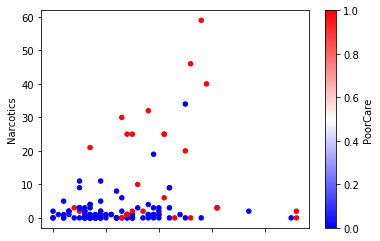

In [5]:
# Observar dados
df.plot.scatter('OfficeVisits', 'Narcotics', c='PoorCare', cmap='bwr')

In [6]:
# Checar quantos pacientes com boas e más experiencias
value_counts = df.PoorCare.value_counts()

In [7]:
# Para métodos de regressão linear, é recomendável que se haja um baseline
# Nesse caso o baseline seria a probabilidade de PoorCare = 0
pGoodCare = value_counts[0] / (value_counts[0] + value_counts[1])
pGoodCare

0.7480916030534351

In [8]:
# Probability of receiving PoorCare
1 - pGoodCare

0.25190839694656486

In [9]:
value_counts

0    98
1    33
Name: PoorCare, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
feat_list = list(df.columns)
feat_list.remove('PoorCare')

X = df[feat_list]
Y = df['PoorCare']

train_data, test_data, train_target, test_target = \
    train_test_split(X, Y, train_size=0.75) 

In [12]:
test_target.value_counts()

0    28
1     5
Name: PoorCare, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg')
logreg.fit(train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
logreg.coef_

array([[-0.00604115,  0.01511625, -0.10292982,  0.0937118 ,  0.10884667,
        -0.00252681, -0.00883289,  0.00589824,  0.0127197 , -0.00636383,
        -0.00437457,  0.94978661,  0.14328965]])

In [15]:
# Predict the actual values
y_pred = logreg.predict(test_data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [16]:
# Predict Probabilities
predict_prob = logreg.predict_proba(test_data)
predict_prob

array([[0.67933291, 0.32066709],
       [0.97772486, 0.02227514],
       [0.74887719, 0.25112281],
       [0.72707757, 0.27292243],
       [0.93448129, 0.06551871],
       [0.95500971, 0.04499029],
       [0.82870635, 0.17129365],
       [0.57153662, 0.42846338],
       [0.73442705, 0.26557295],
       [0.92625555, 0.07374445],
       [0.83221437, 0.16778563],
       [0.95337719, 0.04662281],
       [0.8050306 , 0.1949694 ],
       [0.90457832, 0.09542168],
       [0.93215381, 0.06784619],
       [0.82117604, 0.17882396],
       [0.51917971, 0.48082029],
       [0.12870659, 0.87129341],
       [0.90453147, 0.09546853],
       [0.51976693, 0.48023307],
       [0.04552038, 0.95447962],
       [0.64530786, 0.35469214],
       [0.75452409, 0.24547591],
       [0.9407162 , 0.0592838 ],
       [0.61197618, 0.38802382],
       [0.69137951, 0.30862049],
       [0.74929625, 0.25070375],
       [0.76000158, 0.23999842],
       [0.81725492, 0.18274508],
       [0.8028942 , 0.1971058 ],
       [0.

In [17]:
pgood_care, ppoor_care = list(zip(* predict_prob))
np.mean(pgood_care), np.mean(ppoor_care)

(0.7138767839442108, 0.2861232160557891)

### Volta ao PPT e apresenta as métricas de Avaliação do Erro

### Calculando a matriz de confusão

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_target, y_pred)

array([[24,  2],
       [ 5,  2]])

### Repeat the experiment for different values of t

In [20]:
mythreshold = 0.8
preds = [
    1 if pred[1] > mythreshold else 0
    for pred in logreg.predict_proba(test_data)
]
cm = confusion_matrix(test_target, preds)
print(cm)
eval_sens_spec(cm)

[[25  1]
 [ 5  2]]


NameError: name 'eval_sens_spec' is not defined

In [21]:
def eval_sens_spec(conf_matrix):
    sens = conf_matrix[0][0] / sum(conf_matrix[0])
    spec = conf_matrix[1][1] / sum(conf_matrix[1])
    return spec, sens

def eval_roc_tuple(conf_matrix):
    spec, sens = eval_sens_spec(conf_matrix)
    return 1 - spec, sens

In [22]:
def eval_t(threshold, probabilities):
    preds = [
        1 if pred[1] > threshold else 0
        for pred in probabilities
    ]
    cm = confusion_matrix(test_target, preds)
    return eval_roc_tuple(cm)



In [23]:
ts = np.arange(0, 1.04, 0.01)
probabilities = logreg.predict_proba(test_data)
fun = lambda x: eval_t(x, probabilities)
new_eval_t = np.vectorize(fun)
X, Y = new_eval_t(ts)

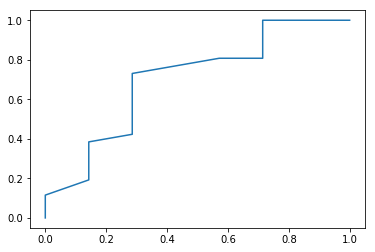

In [24]:
plt.plot(X, Y)

/Users/brunosilva/virtualenvs/generalenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


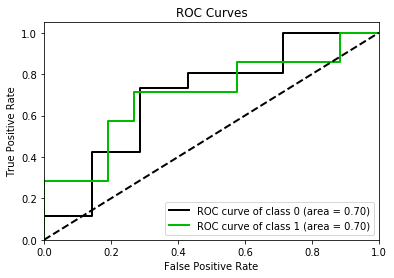

In [27]:
import scikitplot as skplt

import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(test_target, probabilities, curves=('each_class'))
plt.show()

In [26]:
test_target

126    0
68     0
82     1
5      1
56     0
70     0
64     0
29     1
20     1
80     0
91     0
46     1
60     0
108    0
122    0
112    0
6      0
16     0
88     0
105    1
113    1
93     0
87     0
120    0
81     0
33     0
128    0
65     0
12     0
49     0
71     0
39     0
14     0
Name: PoorCare, dtype: int64